In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('dark_background')
#plt.style.use('seaborn-dark')
df=pd.read_csv('census.csv')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [391]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


** So there are no missing values **

In [393]:
# Checking another way
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [394]:
# Dimension of data
df.shape

(45222, 14)

In [395]:
# Name list of columns
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Not necessary to rename them**

In [396]:
df=df.rename(columns={'marital-status':'marital_status','education-num':'education_num','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hour_per_week','native-country':'native_country'})

In [397]:
#changing imcome to boolean( True for > 50K and False for <=50K)
# df.replace({'income':{'<=50K':True,'>50K':False}},inplace=True)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [398]:
# Dropping education_level
df.drop('education_level', axis = 1, inplace = True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_country,income
0,39,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [399]:
#Univariable statistics
#counting the number of peoples haing different incomes
#print('Total number of data :',df.income.count())
print('Total number of data :',df.shape[0])
print('People having income <50K :',df[df.income==True].income.count())
print('People having income <=50K :',df[df.income==False].income.count())

print('Number of male:',df[df.sex==' Male'].sex.count())
print('Number of female:',df[df.sex==' Female'].sex.count())


Total number of data : 45222
People having income <50K : 11208
People having income <=50K : 34014
Number of male: 30527
Number of female: 14695


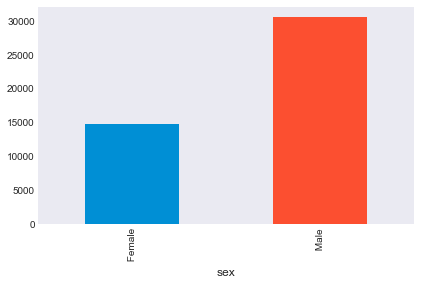

In [400]:

df.groupby('sex').race.count().plot(kind = 'bar')

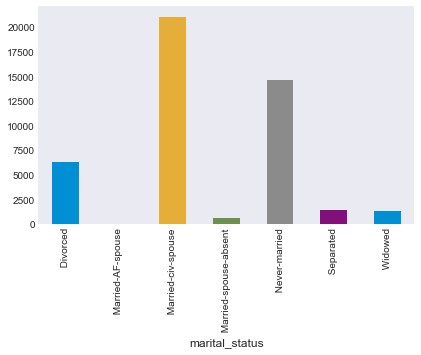

In [401]:

df.groupby('marital_status').race.count().plot(kind = 'bar')

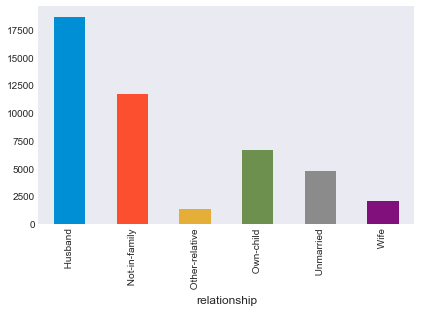

In [402]:

df.groupby('relationship').race.count().plot(kind = 'bar')

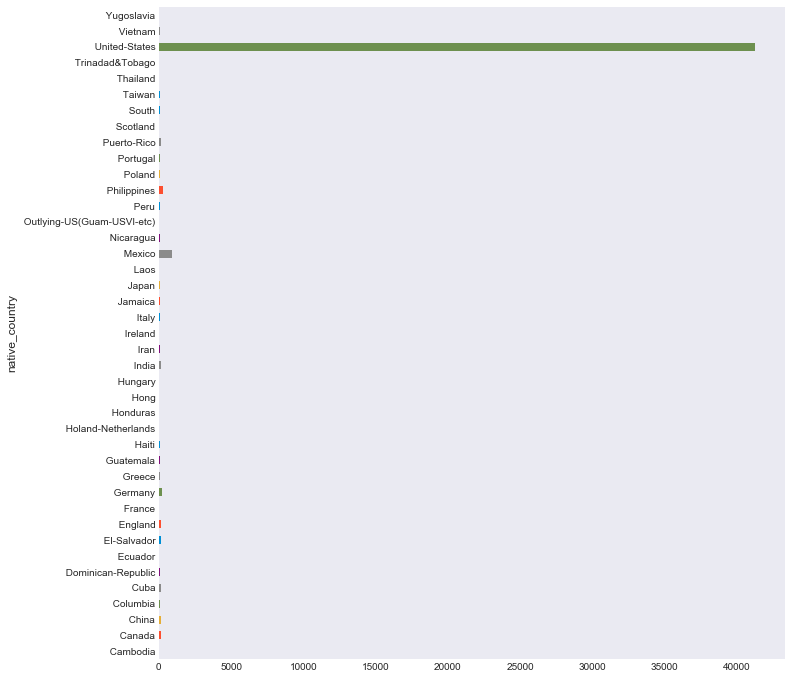

In [403]:
plt.figure(figsize = (10,12))
df.groupby('native_country').race.count().plot(kind = 'barh')

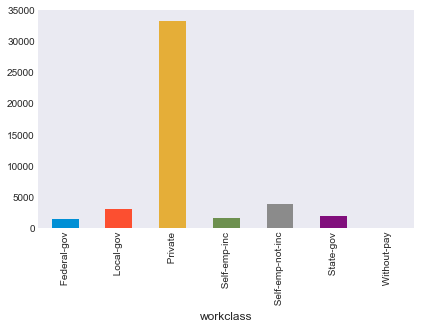

In [404]:

df.groupby('workclass').race.count().plot(kind = 'bar')

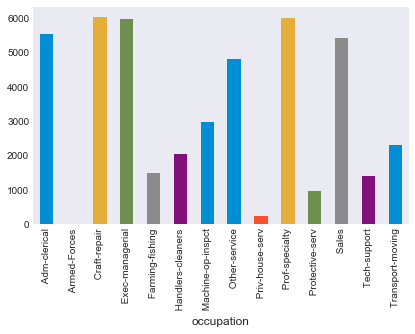

In [405]:

df.groupby('occupation').race.count().plot(kind = 'bar')

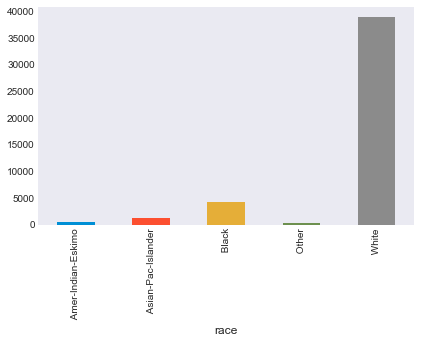

In [406]:

df.groupby('race').race.count().plot(kind = 'bar')

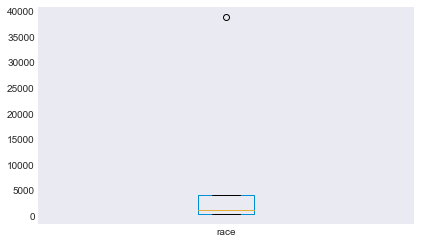

In [407]:
df.groupby('race').race.count().plot(kind = 'box')

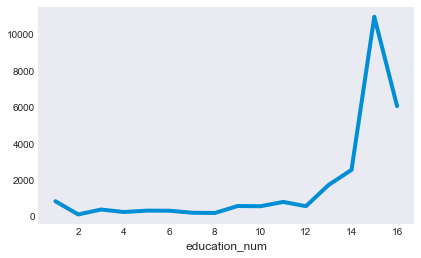

In [408]:

df.groupby('education_num').capital_gain.mean().plot()

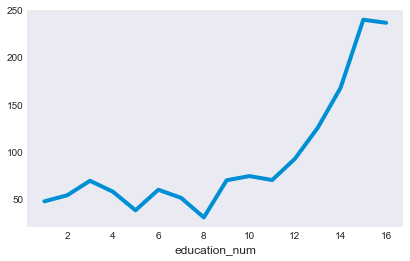

In [409]:

df.groupby('education_num').capital_loss.mean().plot()

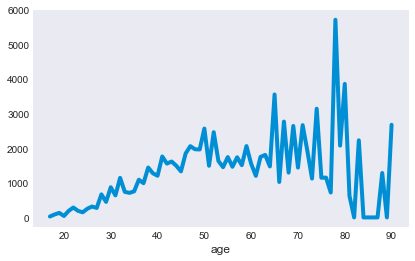

In [410]:

df.groupby('age').capital_gain.mean().plot()

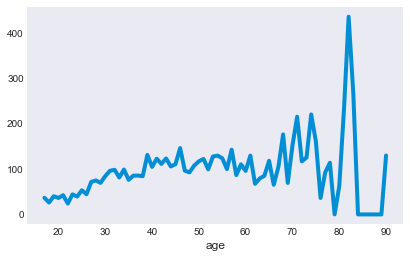

In [411]:

df.groupby('age').capital_loss.mean().plot()

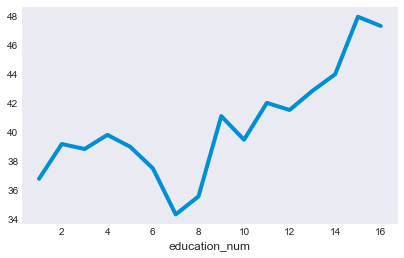

In [412]:

df.groupby('education_num').hour_per_week.mean().plot()

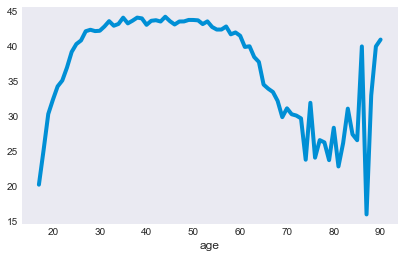

In [413]:

df.groupby('age').hour_per_week.mean().plot()

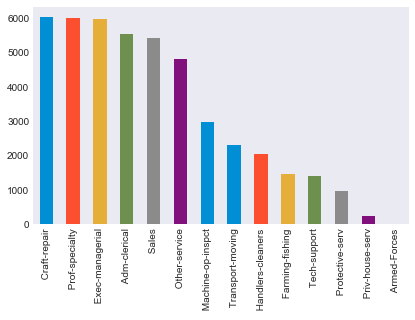

In [414]:
# Another way using value_counts
df.occupation.value_counts().plot(kind = 'bar')

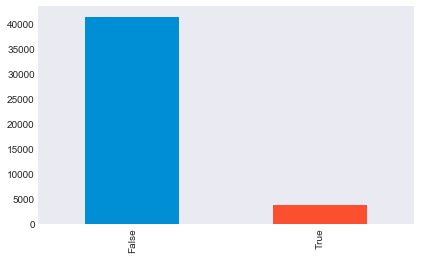

In [415]:
df_g = df['capital_gain'] != 0
df_g.value_counts().plot(kind = 'bar')

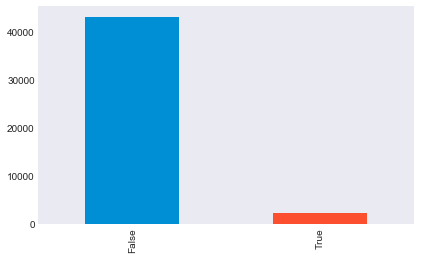

In [416]:
df_l = df['capital_loss'] != 0
df_l.value_counts().plot(kind = 'bar')

Counter({' White': 38903, ' Black': 4228, ' Asian-Pac-Islander': 1303, ' Amer-Indian-Eskimo': 435, ' Other': 353})


<BarContainer object of 5 artists>

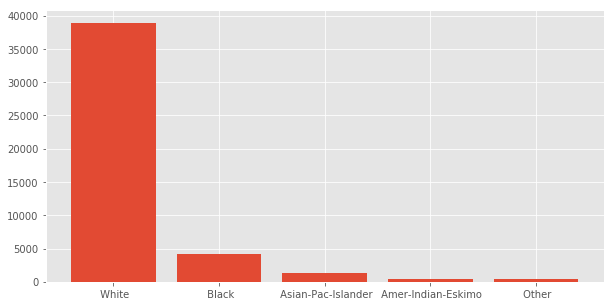

In [259]:
#Number of people with different race
import collections
race_data=collections.Counter(df.race)
print(race_data)
plt.figure(figsize=[10,5])
plt.bar(race_data.keys(),race_data.values())

In [260]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [261]:
print('Data is significantely dominated by the people of white race.')

Data is significantely dominated by the people of white race.


Counter({' Craft-repair': 6020, ' Prof-specialty': 6008, ' Exec-managerial': 5984, ' Adm-clerical': 5540, ' Sales': 5408, ' Other-service': 4808, ' Machine-op-inspct': 2970, ' Transport-moving': 2316, ' Handlers-cleaners': 2046, ' Farming-fishing': 1480, ' Tech-support': 1420, ' Protective-serv': 976, ' Priv-house-serv': 232, ' Armed-Forces': 14})


<BarContainer object of 14 artists>

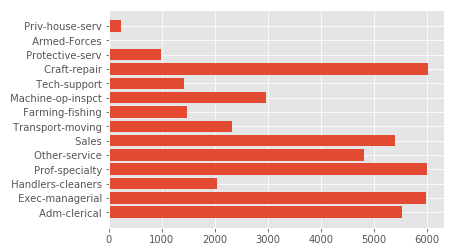

In [262]:
#Number of data with different occupation
occupation_data=collections.Counter(df.occupation)
print(occupation_data)
#plt.figure(figsize=[15,3])
lok=list(occupation_data.keys())
lov=list(occupation_data.values())
plt.barh(lok,lov)

In [263]:
print('There are more data for Sales Prof-Speciality, Ecex-managerial, Craft-repair and Adm-clerical.')

There are more data for Sales Prof-Speciality, Ecex-managerial, Craft-repair and Adm-clerical.


In [264]:
df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hour_per_week', 'native_country', 'income'],
      dtype='object')

Counter({' Private': 33307, ' Self-emp-not-inc': 3796, ' Local-gov': 3100, ' State-gov': 1946, ' Self-emp-inc': 1646, ' Federal-gov': 1406, ' Without-pay': 21})


<BarContainer object of 7 artists>

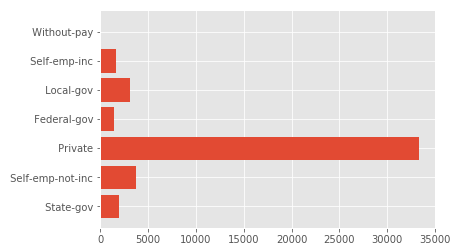

In [265]:
#Number of peoples in different occupation
workclass_data=collections.Counter(df.workclass)
print(workclass_data)
#plt.figure(figsize=[15,3])
lwk=list(workclass_data.keys())
lwv=list(workclass_data.values())
plt.barh(lwk,lwv)

In [266]:
print('Most of the people works in private sector.')

Most of the people works in private sector.


In [267]:
#Number of peoples in different education level
education_level_data=collections.Counter(df.education_level)
print(education_level_data)
#plt.figure(figsize=[15,3])
lelk=list(education_level_data.keys())
lelv=list(education_level_data.values())
plt.barh(lelk,lelv)

AttributeError: 'DataFrame' object has no attribute 'education_level'

In [268]:
print('Significant number of people has HS degree and than some college education.')

Significant number of people has HS degree and than some college education.


Counter({' United-States': 41292, ' Mexico': 903, ' Philippines': 283, ' Germany': 193, ' Puerto-Rico': 175, ' Canada': 163, ' India': 147, ' El-Salvador': 147, ' Cuba': 133, ' England': 119, ' China': 113, ' Jamaica': 103, ' South': 101, ' Italy': 100, ' Dominican-Republic': 97, ' Japan': 89, ' Guatemala': 86, ' Vietnam': 83, ' Columbia': 82, ' Poland': 81, ' Haiti': 69, ' Portugal': 62, ' Iran': 56, ' Taiwan': 55, ' Greece': 49, ' Nicaragua': 48, ' Peru': 45, ' Ecuador': 43, ' France': 36, ' Ireland': 36, ' Thailand': 29, ' Hong': 28, ' Cambodia': 26, ' Trinadad&Tobago': 26, ' Yugoslavia': 23, ' Outlying-US(Guam-USVI-etc)': 22, ' Laos': 21, ' Scotland': 20, ' Honduras': 19, ' Hungary': 18, ' Holand-Netherlands': 1})


<BarContainer object of 41 artists>

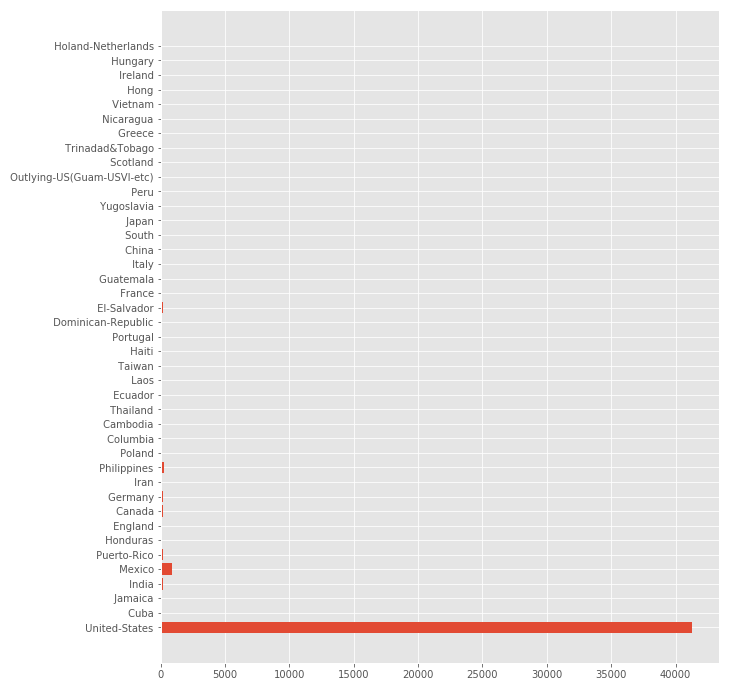

In [269]:
#Number of peoples in different native countries
native_country_data=collections.Counter(df.native_country)
print(native_country_data)
#plt.figure(figsize=[15,3])
lnck=list(native_country_data.keys())
lncv=list(native_country_data.values())
plt.figure(figsize=[10,12])
plt.barh(lnck,lncv)

In [270]:
percent_of_usa=41292/45222*100
print(round(percent_of_usa,2),'% of people are from USA which dominates the most of the statistics')

91.31 % of people are from USA which dominates the most of the statistics


Counter({' Married-civ-spouse': 21055, ' Never-married': 14598, ' Divorced': 6297, ' Separated': 1411, ' Widowed': 1277, ' Married-spouse-absent': 552, ' Married-AF-spouse': 32})


<BarContainer object of 7 artists>

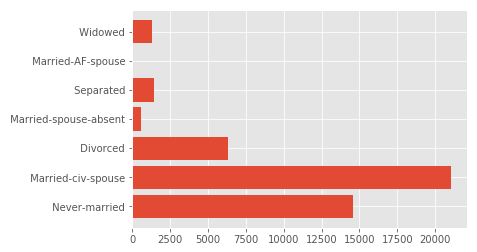

In [271]:
#Number of peoples in different marital_status
marital_status_data=collections.Counter(df.marital_status)
print(marital_status_data)
#plt.figure(figsize=[15,3])
lmsk=list(marital_status_data.keys())
lmsv=list(marital_status_data.values())
plt.barh(lmsk,lmsv)

# Bivariate plots 

In [272]:
import seaborn as sns

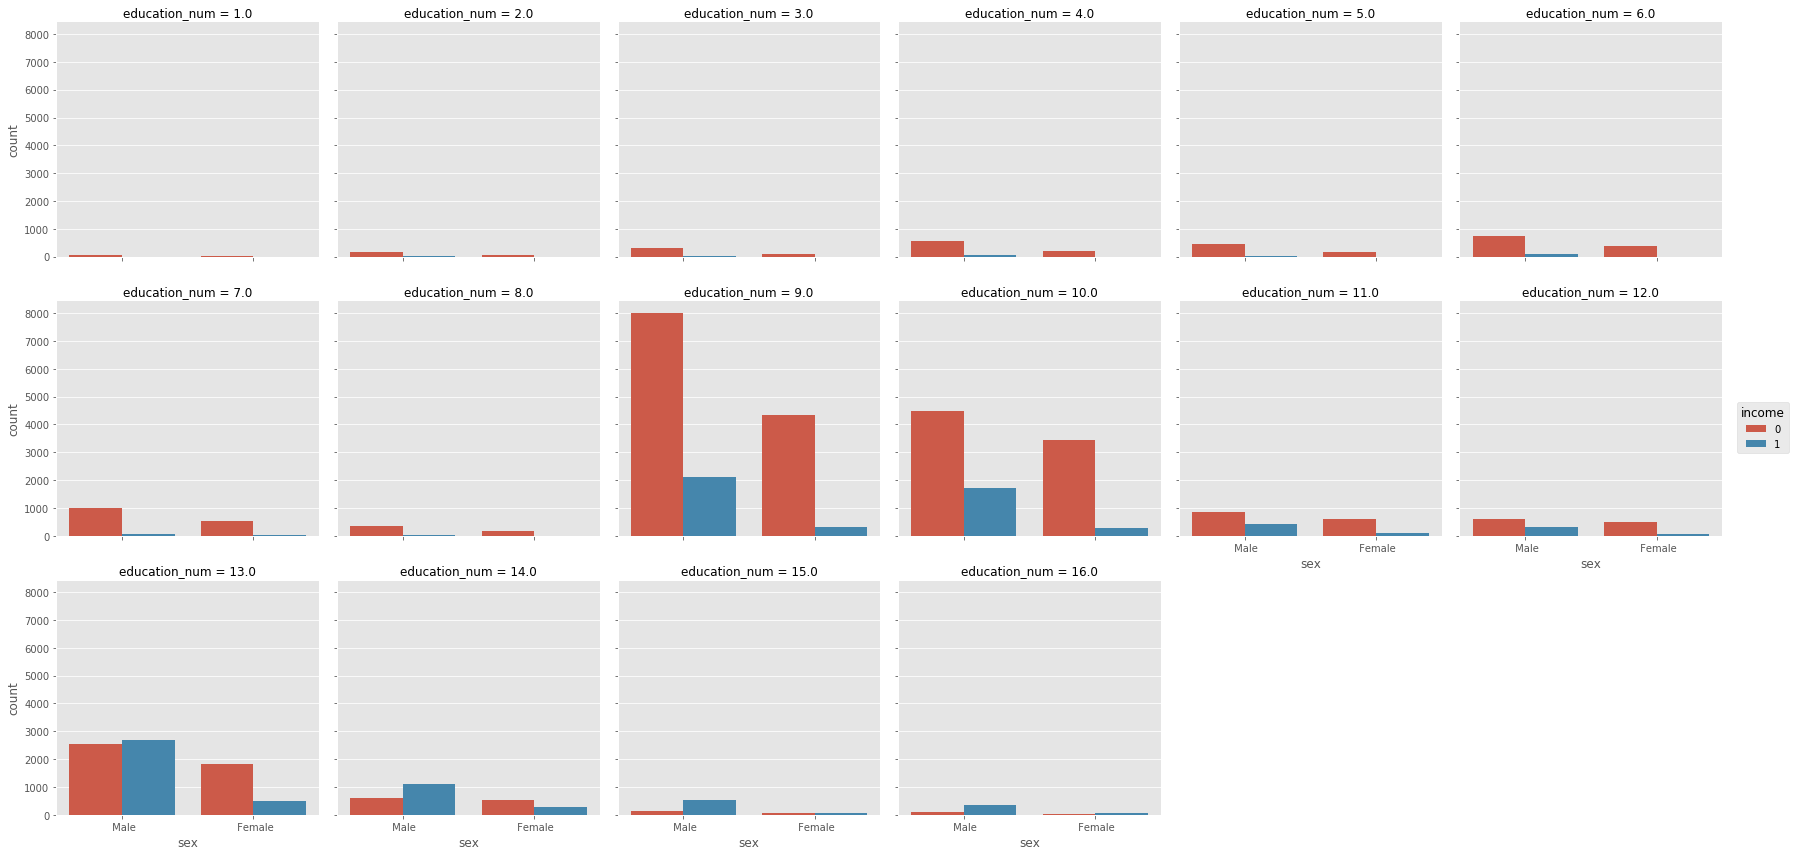

In [292]:
sns.factorplot('sex',col='education_num',data=df,hue='income',kind='count',col_wrap=6)

In [293]:
print('People with 12th grade or above has higher change of having income more than 50K compared to the people with lower education.')
print('Compared to female of same education level, male has higher probability to have income greater than 50K.')

People with 12th grade or above has higher change of having income more than 50K compared to the people with lower education.
Compared to female of same education level, male has higher probability to have income greater than 50K.


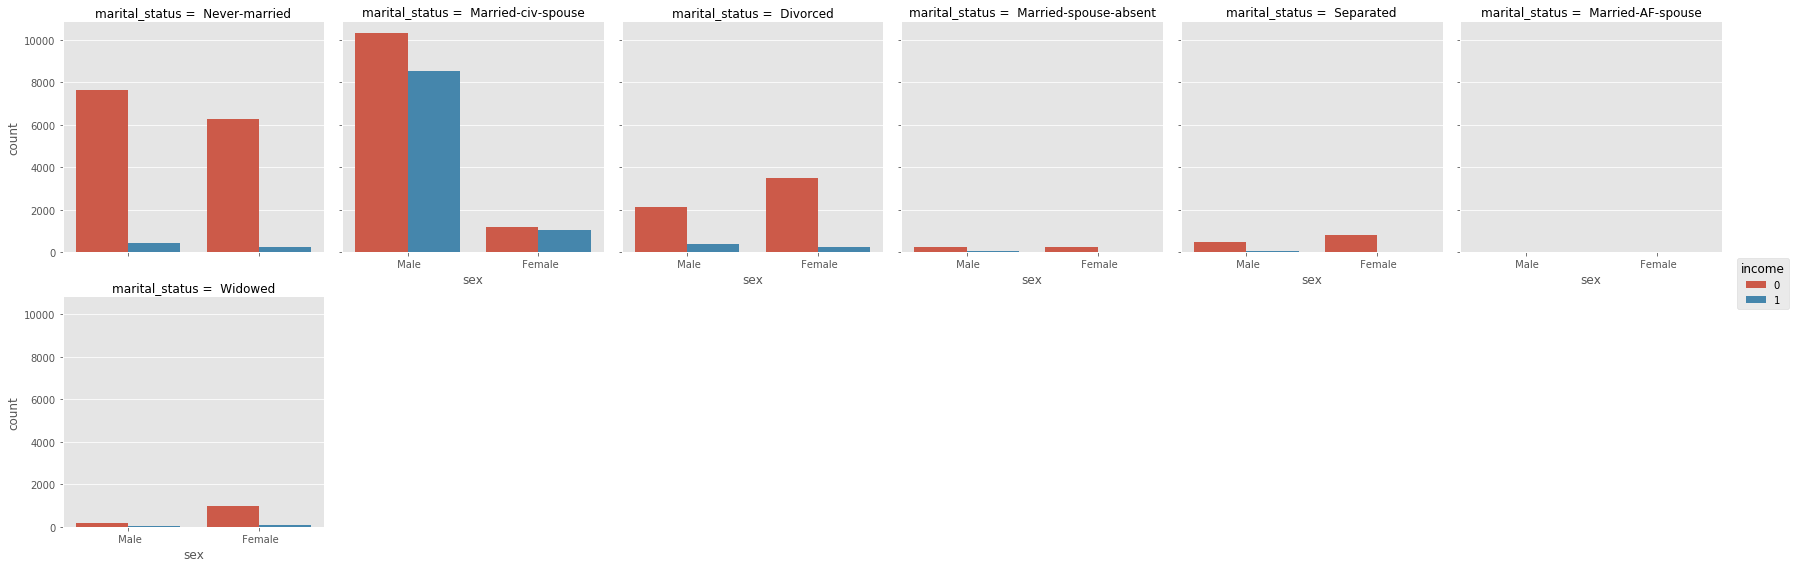

In [294]:
sns.factorplot('sex',col='marital_status',data=df,hue='income',kind='count',col_wrap=6)

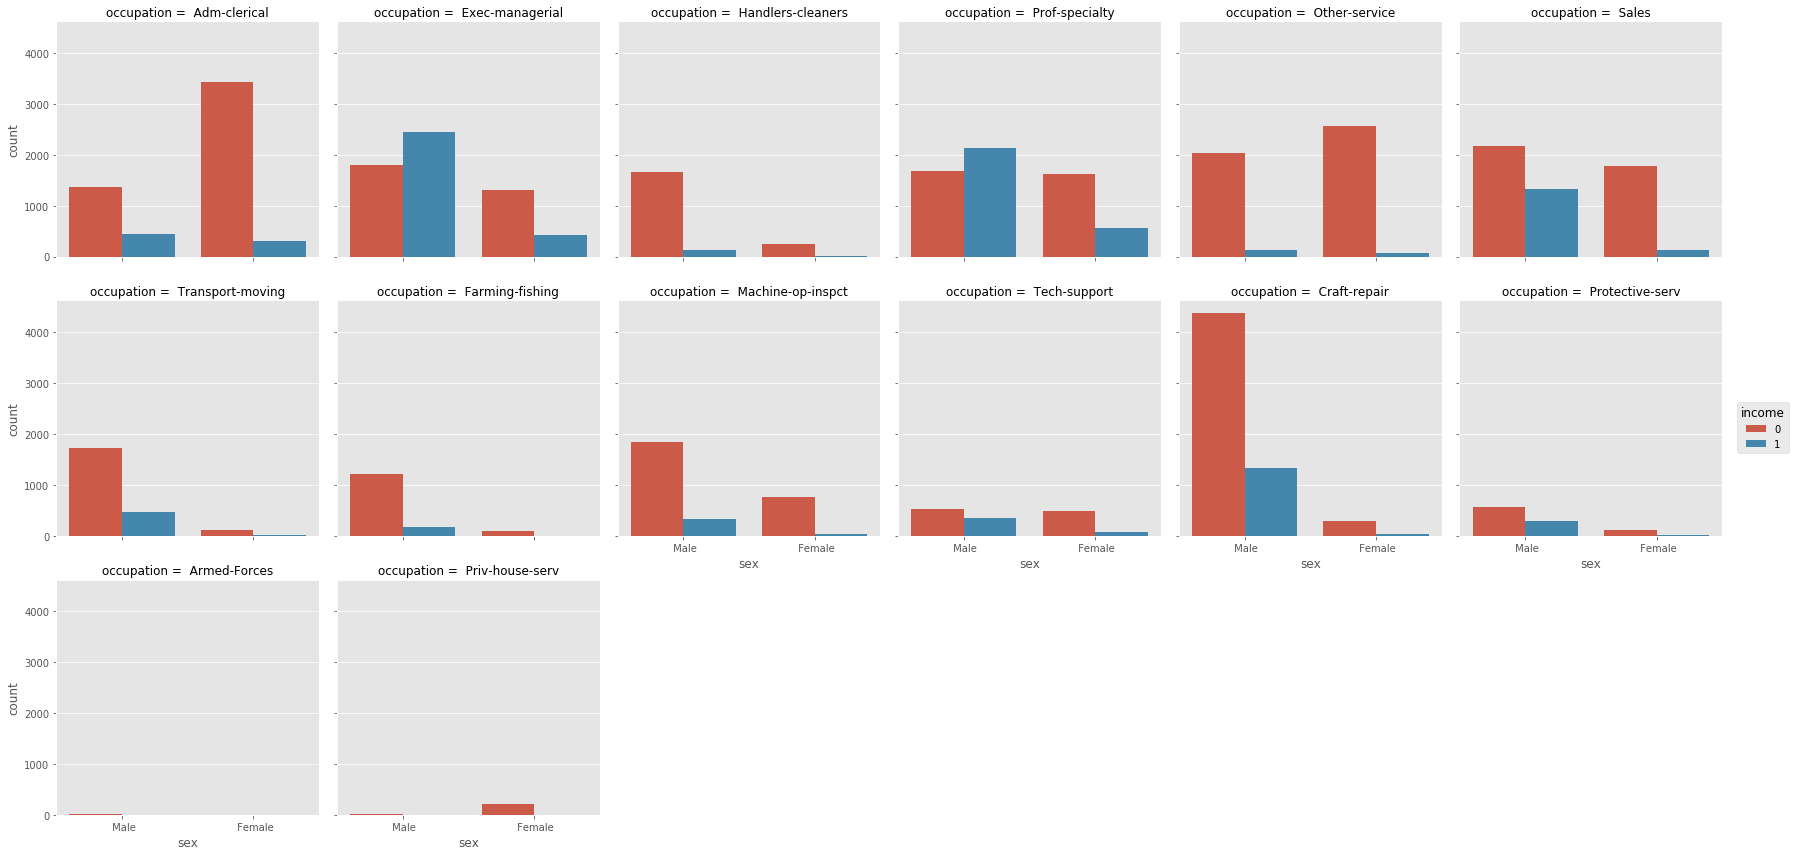

In [295]:
sns.factorplot('sex',col='occupation',data=df,hue='income',kind='count',col_wrap=6)

In [296]:
print('Occupation wise, people with Exec-managerial position and prof-speciality has higher chance to have income grater than 50K.')
print('Compared to female with same occupation, male has higher chance to have income grater than 50K.')

Occupation wise, people with Exec-managerial position and prof-speciality has higher chance to have income grater than 50K.
Compared to female with same occupation, male has higher chance to have income grater than 50K.


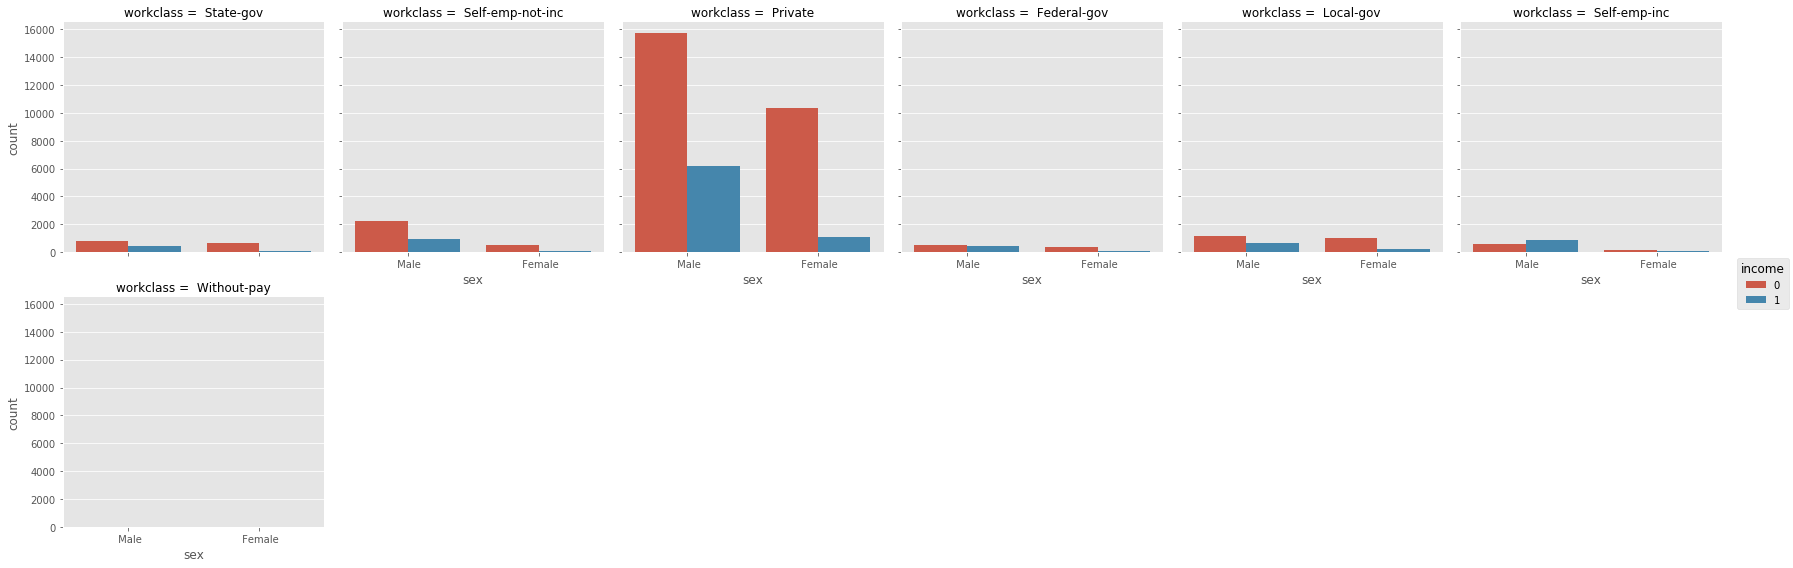

In [297]:
sns.factorplot('sex',col='workclass',data=df,hue='income',kind='count',col_wrap=6)

In [298]:
print('Self-emp-inc has higher change of having income grater than 50K.')

Self-emp-inc has higher change of having income grater than 50K.


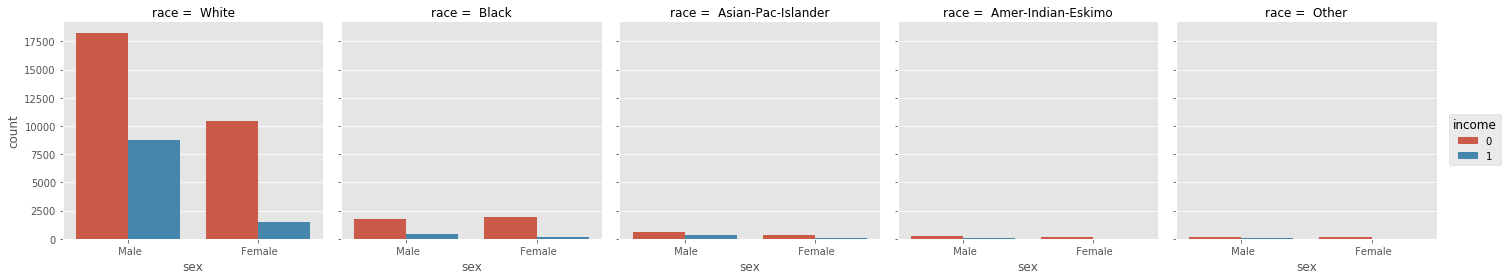

In [299]:
sns.factorplot('sex',col='race',data=df,hue='income',kind='count',col_wrap=5)

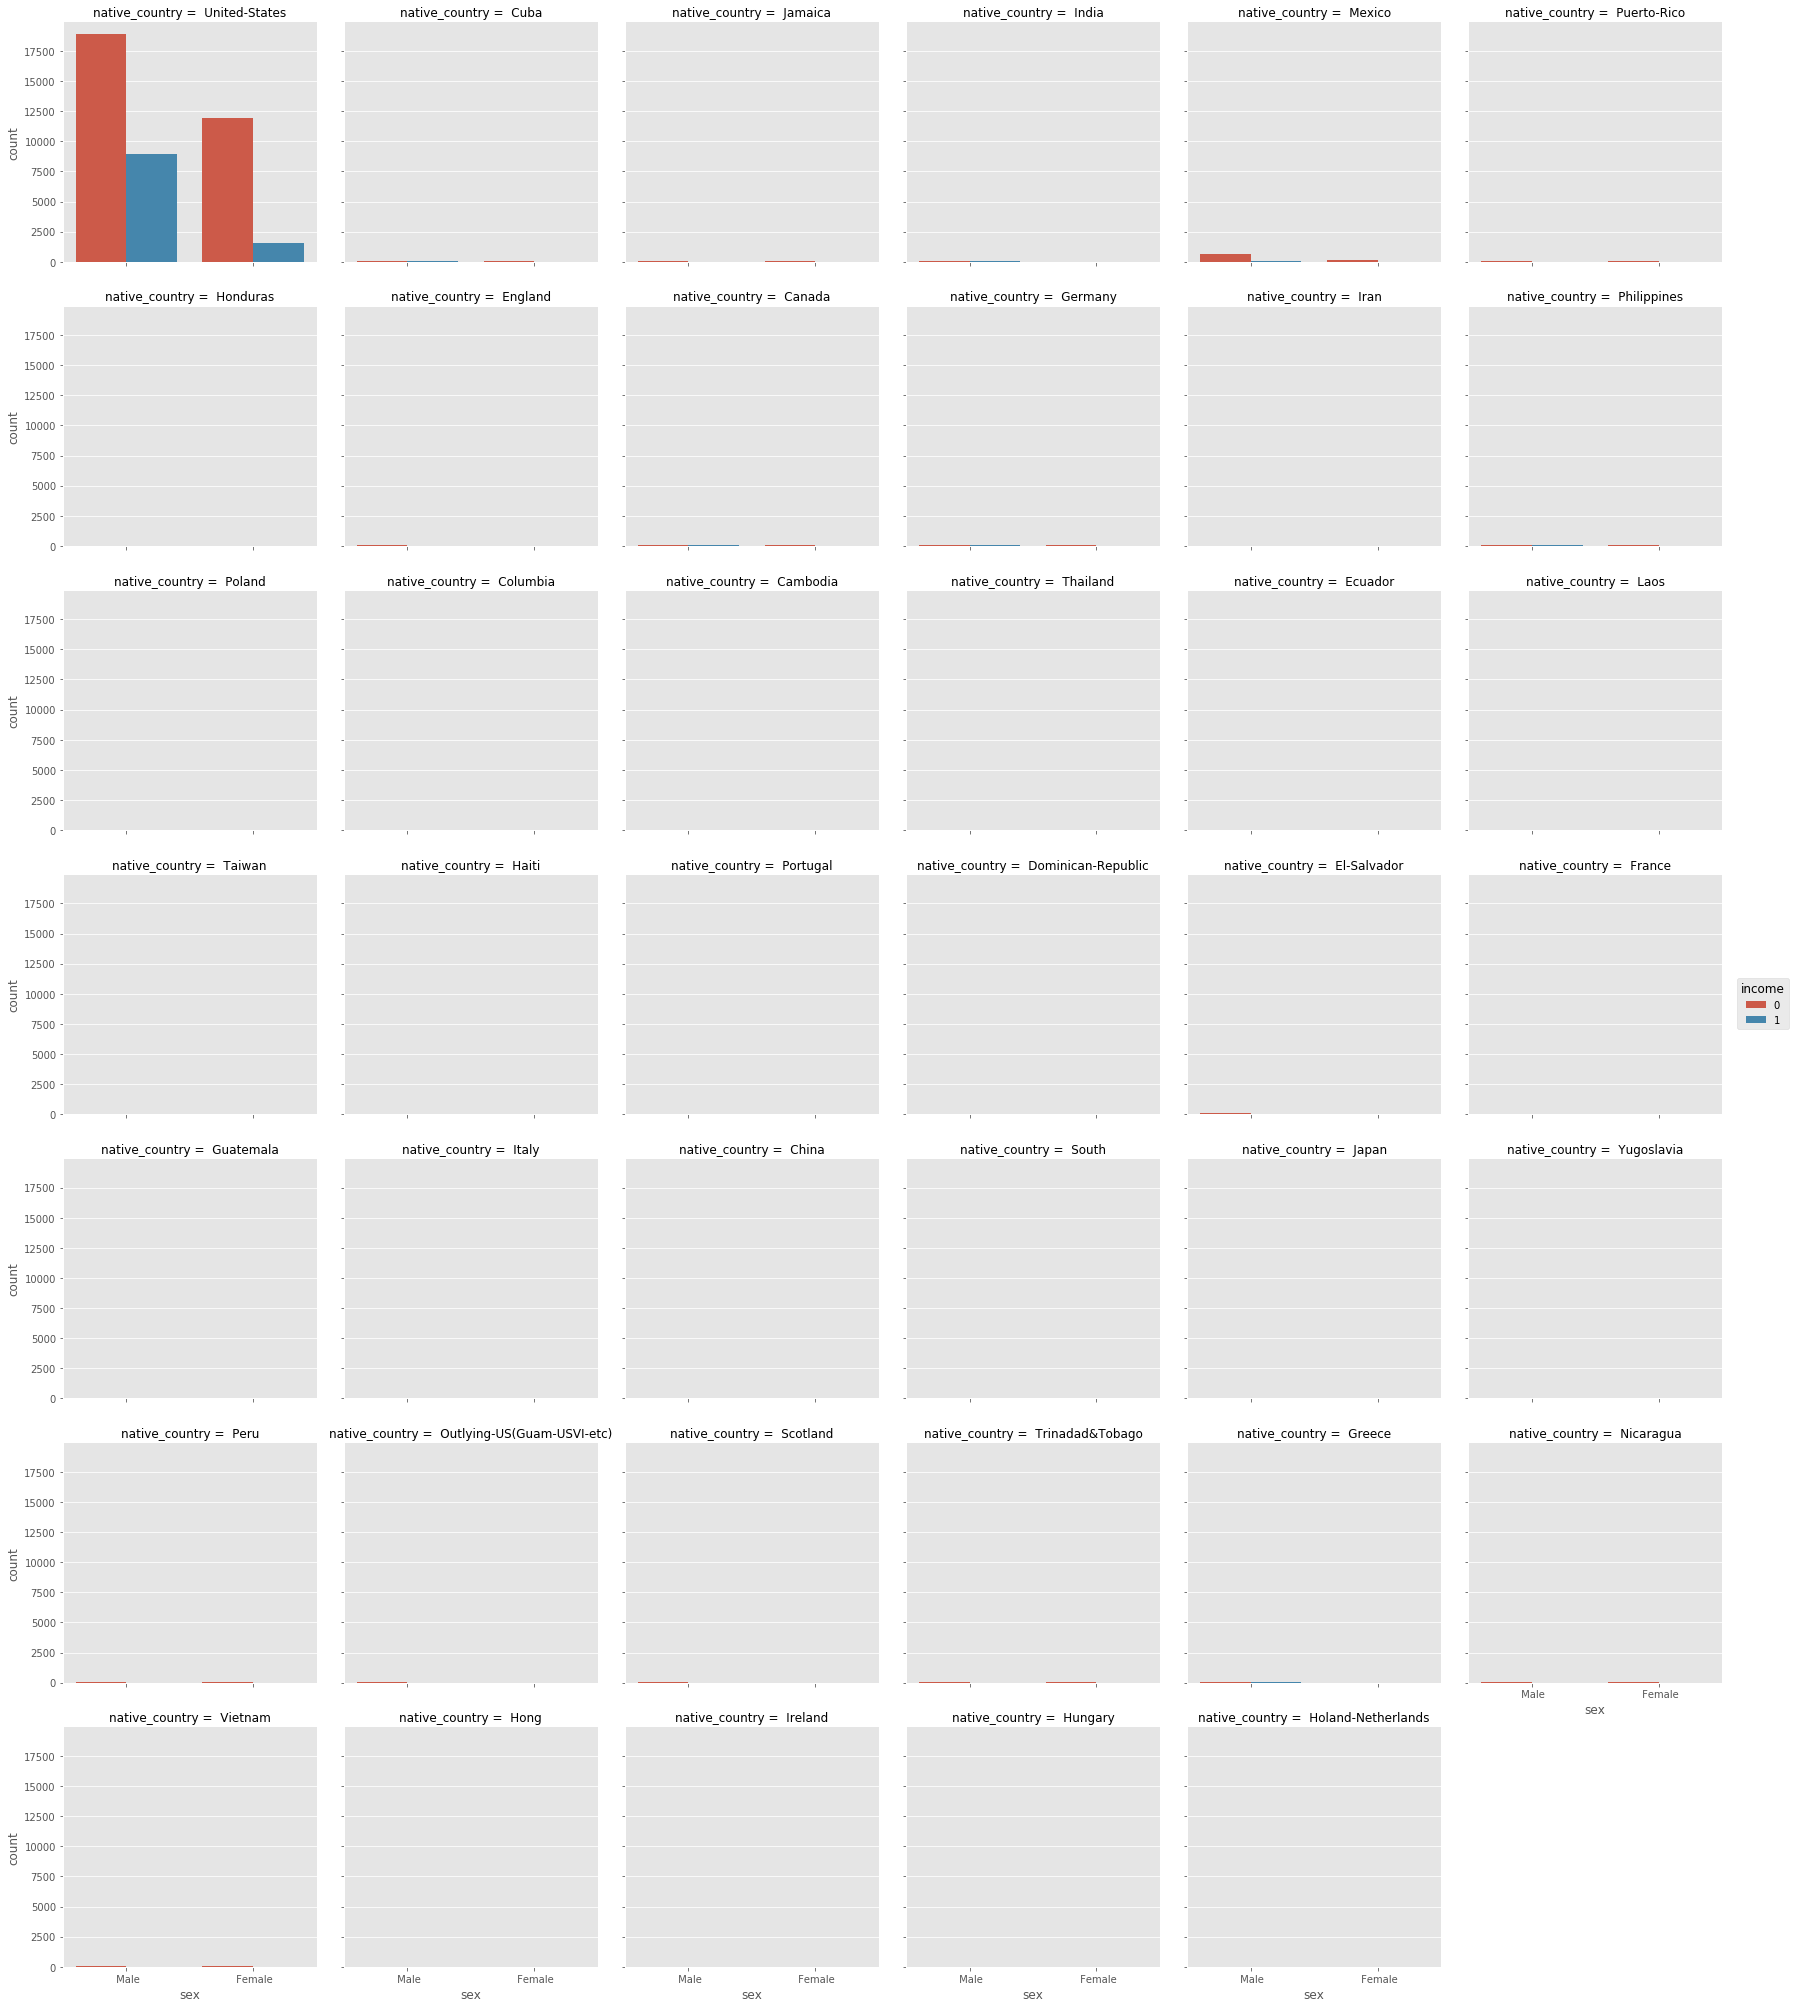

In [300]:
sns.factorplot('sex',col='native_country',data=df,hue='income',kind='count',col_wrap=6)

In [301]:
print('Most of the data is from USA, and in USA male tends to have higher probability to have income grater than 50k compared to female.')
print('The data from other conutries are not significant.')

Most of the data is from USA, and in USA male tends to have higher probability to have income grater than 50k compared to female.
The data from other conutries are not significant.


Text(0,0.5,'Mean capital gain')

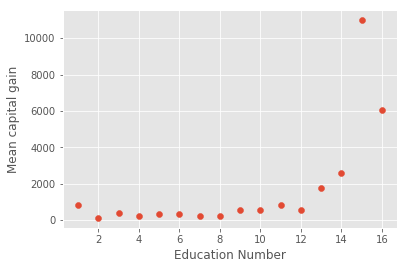

In [302]:
lis_of_edu=list(df.education_num.unique())
gain_mean=[]
for i in lis_of_edu:
    a=np.mean(df.capital_gain[df.education_num==i])
    gain_mean.append(a)
gain_mean
plt.scatter(lis_of_edu,gain_mean)    
plt.xlabel('Education Number')
plt.ylabel('Mean capital gain')

In [303]:
print('People with higher capital gain has high capital gain.')

People with higher capital gain has high capital gain.


Text(0,0.5,'Mean capital loss')

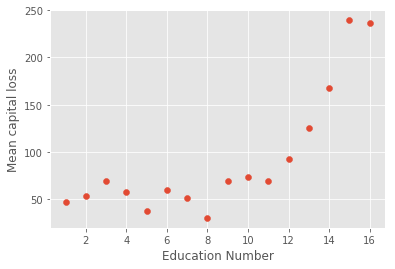

In [304]:
lis_of_edu=list(df.education_num.unique())
loss_mean=[]
for i in lis_of_edu:
    b=np.mean(df.capital_loss[df.education_num==i])
    loss_mean.append(b)
loss_mean
plt.scatter(lis_of_edu,loss_mean)    
plt.xlabel('Education Number')
plt.ylabel('Mean capital loss')

In [305]:
print('People with higher education has also have high capotal loss.')

People with higher education has also have high capotal loss.


Text(0,0.5,'Mean capital gain')

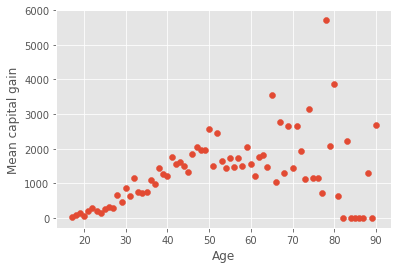

In [306]:
lis=list(df.age.unique())
gain_mean_age=[]
for i in lis:
    a=np.mean(df.capital_gain[df.age==i])
    gain_mean_age.append(a)
gain_mean_age
plt.scatter(lis,gain_mean_age)    
plt.xlabel('Age')
plt.ylabel('Mean capital gain')

Text(0,0.5,'Mean capital loss')

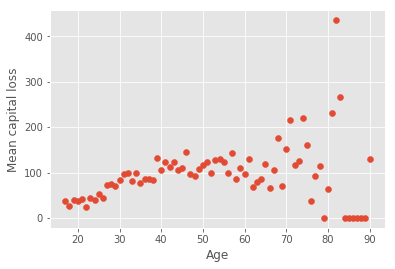

In [307]:
lis=list(df.age.unique())
loss_mean_age=[]
for i in lis:
    a=np.mean(df.capital_loss[df.age==i])
    loss_mean_age.append(a)
loss_mean_age
plt.scatter(lis,loss_mean_age)    
plt.xlabel('Age')
plt.ylabel('Mean capital loss')

Text(0,0.5,'Mean working hours')

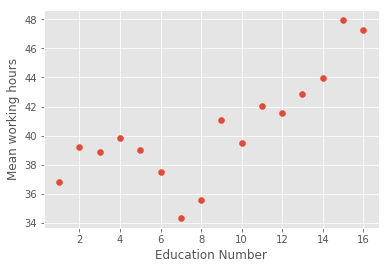

In [308]:
lis_of_edu=list(df.education_num.unique())
wr_mean_age=[]
for i in lis_of_edu:
    a=np.mean(df.hour_per_week[df.education_num==i])
    wr_mean_age.append(a)
wr_mean_age
plt.scatter(lis_of_edu,wr_mean_age)    
plt.xlabel('Education Number')
plt.ylabel('Mean working hours')

Text(0,0.5,'Mean capital loss')

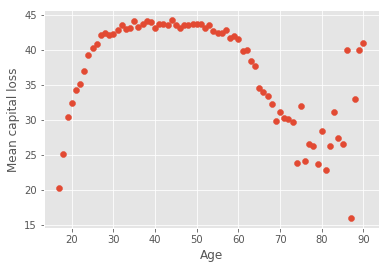

In [290]:
lis=list(df.age.unique())
wr_mean_age=[]
for i in lis:
    a=np.mean(df.hour_per_week[df.age==i])
    wr_mean_age.append(a)
wr_mean_age
plt.scatter(lis,wr_mean_age)    
plt.xlabel('Age')
plt.ylabel('Mean capital loss')

In [291]:
print('people in age range 30 to 60 tends to work more')

people in age range 30 to 60 tends to work more
